# Data Visualization: Ford Go Bike Data

## Dataset Overview
The data contains 183412 trips made on the Ford Go bike and each trip has 16 attributes. 

## Data Wrangling

<b>In this section, I would like to carry out some data wrangling steps before I start with the exploration</b>

<li>Drop rows where start_station_id is nul</li>
<li>Convert the duration in seconds to minutes and hours</li>
<li>Convert the datatypes of start_station_id and end_station_id to integer</li>
<li>Segregate the start_time into indvidual fields like start_date and start_time</li>
<li>Segregate the end_time into indvidual fields like end_date and end_time</li>
<li>Extract day and month from start date, end date</li>

In [181]:
#import all necessary packages and set plot to be embedded inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import time
%matplotlib inline

In [182]:
#load the dataset into pandas dataframe
go_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
#view the first five(5) rows of the dataset
go_bike.sample(50)

,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,age
8109,3.750000,225,2019-02-15 07:10:54.353,2019-02-15 07:14:39.7740,58.0,Market St at 10th St,37.776619,-122.417385,88.0,11th St at Bryant St,...,1987.0,Male,No,2,Feb,7,morning,4,Fri,35.0
14420,11.450000,687,2019-02-04 07:42:21.527,2019-02-04 07:53:49.1810,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,42.0,San Francisco City Hall (Polk St at Grove St),...,1984.0,Female,No,2,Feb,7,morning,0,Mon,38.0
10149,6.083333,365,2019-02-11 17:05:33.814,2019-02-11 17:11:39.7110,81.0,Berry St at 4th St,37.775880,-122.393170,27.0,Beale St at Harrison St,...,1990.0,Male,No,2,Feb,17,afternoon,0,Mon,32.0
7415,35.000000,2100,2019-02-16 12:47:49.250,2019-02-16 13:22:49.7620,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,6.0,The Embarcadero at Sansome St,...,1991.0,Female,No,2,Feb,12,afternoon,5,Sat,31.0
7840,4.683333,281,2019-02-15 12:46:55.267,2019-02-15 12:51:36.2840,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,44.0,Civic Center/UN Plaza BART Station (Market St ...,...,1994.0,Female,No,2,Feb,12,afternoon,4,Fri,28.0
4375,10.750000,645,2019-02-21 17:07:44.221,2019-02-21 17:18:29.4800,58.0,Market St at 10th St,37.776619,-122.417385,134.0,Valencia St at 24th St,...,1981.0,Female,No,2,Feb,17,afternoon,3,Thu,41.0
4710,5.600000,336,2019-02-21 09:16:36.033,2019-02-21 09:22:12.1270,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,...,1971.0,Male,No,2,Feb,9,morning,3,Thu,51.0
14506,7.550000,453,2019-02-03 16:25:06.164,2019-02-03 16:32:39.7820,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,...,1995.0,Male,No,2,Feb,16,afternoon,6,Sun,27.0
2333,9.866667,592,2019-02-25 17:05:08.174,2019-02-25 17:15:00.8190,81.0,Berry St at 4th St,37.775880,-122.393170,5.0,Powell St BART Station (Market St at 5th St),...,1979.0,Male,No,2,Feb,17,afternoon,0,Mon,43.0
961,7.933333,476,2019-02-27 19:44:44.078,2019-02-27 19:52:40.5380,58.0,Market St at 10th St,37.776619,-122.417385,370.0,Jones St at Post St,...,1988.0,Male,No,2,Feb,19,night,2,Wed,34.0


In [183]:
#view the dataframe's information
go_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15340 entries, 0 to 15339
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_min             15340 non-null  float64
 1   duration_sec             15340 non-null  int64  
 2   start_time               15340 non-null  object 
 3   end_time                 15340 non-null  object 
 4   start_station_id         15340 non-null  float64
 5   start_station_name       15340 non-null  object 
 6   start_station_latitude   15340 non-null  float64
 7   start_station_longitude  15340 non-null  float64
 8   end_station_id           15340 non-null  float64
 9   end_station_name         15340 non-null  object 
 10  end_station_latitude     15340 non-null  float64
 11  end_station_longitude    15340 non-null  float64
 12  bike_id                  15340 non-null  int64  
 13  user_type                15340 non-null  object 
 14  member_birth_year     

The information above shows that the data has 15340 entries and 24 columns. 9 of those columns have a float datatype, 5 have an integer datatype and 10 have a string datatype.

In [184]:
go_bike.shape

(15340, 24)

In [234]:
#Checking the missing values
go_bike.isnull().sum()

age                        0
duration_min               0
duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_month_num            0
start_month_char           0
start_hour                 0
period_day                 0
start_weekday_num          0
start_weekday_char         0
dtype: int64

<b> There are no missing values in the dataframe</b>

In [186]:
#Drop the rows with missing values
go_bike.dropna(inplace=True)


In [187]:
# Statical look over the dataset
go_bike.describe()

,duration_min,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_month_num,start_hour,start_weekday_num,age
count,15340.000000,15340.000000,15340.000000,15340.000000,15340.000000,15340.000000,15340.000000,15340.000000,15340.000000,15340.000000,15340.0,15340.000000,15340.000000,15340.000000
mean,11.634217,698.052999,48.492894,37.780446,-122.402808,91.653977,37.780320,-122.405163,4629.697588,1985.269231,2.0,13.401695,2.432790,36.730769
std,29.313509,1758.810533,28.072355,0.005623,0.009037,106.496757,0.012051,0.013146,1615.632738,9.829865,0.0,4.588986,1.685326,9.829865
min,1.016667,61.000000,3.000000,37.775880,-122.417385,3.000000,37.317298,-122.453704,11.000000,1900.000000,2.0,0.000000,0.000000,21.000000
25%,6.466667,388.000000,21.000000,37.776619,-122.404904,21.000000,37.773311,-122.411738,4407.000000,1981.000000,2.0,9.000000,1.000000,30.000000
50%,9.033333,542.000000,58.000000,37.776639,-122.400811,58.000000,37.780526,-122.402717,5048.000000,1987.000000,2.0,14.000000,2.000000,35.000000
75%,12.366667,742.000000,67.000000,37.786375,-122.395526,96.000000,37.789625,-122.394643,5546.000000,1992.000000,2.0,17.000000,4.000000,41.000000
max,1409.133333,84548.000000,81.000000,37.789625,-122.393170,386.000000,37.804770,-121.884995,6644.000000,2001.000000,2.0,23.000000,6.000000,122.000000


In [188]:
# 1. Convert time variables from string to datetime
# a. month of the year
go_bike['start_time'] = pd.to_datetime(go_bike['start_time'])
go_bike['start_month_num'] = go_bike['start_time'].apply(lambda time: time.month)
go_bike['start_month_char'] = go_bike['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [189]:
# Test: take a loo at start_month_num and start_month_char
print(go_bike['start_month_num'].value_counts())
print(go_bike['start_month_char'].value_counts())

2    15340
Name: start_month_num, dtype: int64
Feb    15340
Name: start_month_char, dtype: int64


In [190]:
#categorise time into morning, afternoon, or night
go_bike['start_hour'] = go_bike['start_time'].apply(lambda time: time.hour)
go_bike['period_day'] = 'morning'
go_bike['period_day'][(go_bike['start_hour'] >= 12) & (go_bike['start_hour'] <= 17)] = 'afternoon'
go_bike['period_day'][(go_bike['start_hour'] >= 18) & (go_bike['start_hour'] <= 23)] = 'night'

C:\Users\User\AppData\Local\Temp\ipykernel_8028\3530844118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_bike['period_day'][(go_bike['start_hour'] >= 12) & (go_bike['start_hour'] <= 17)] = 'afternoon'
C:\Users\User\AppData\Local\Temp\ipykernel_8028\3530844118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_bike['period_day'][(go_bike['start_hour'] >= 18) & (go_bike['start_hour'] <= 23)] = 'night'


In [191]:
# Test: start hour and time of day
print(go_bike['start_hour'].value_counts())
print(go_bike['period_day'].value_counts())

17    2157
8     1942
9     1759
18    1572
16    1075
19     936
10     782
7      773
12     631
13     631
11     594
15     573
14     526
20     494
21     278
6      262
22     149
23      86
0       50
5       27
2       19
1       15
4        6
3        3
Name: start_hour, dtype: int64
morning      6232
afternoon    5593
night        3515
Name: period_day, dtype: int64


In [192]:
#categorise rides based on days of the week
go_bike['start_weekday_num'] = go_bike['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
go_bike['start_weekday_char'] = go_bike['start_weekday_num'].map(dmap)

In [193]:
# Test: take a look at start_weekday_num and start_weekday_char
print(go_bike['start_weekday_num'].value_counts())
print(go_bike['start_weekday_char'].value_counts())

3    3200
1    2918
2    2635
4    2574
0    2324
5     899
6     790
Name: start_weekday_num, dtype: int64
Thu    3200
Tue    2918
Wed    2635
Fri    2574
Mon    2324
Sat     899
Sun     790
Name: start_weekday_char, dtype: int64


In [194]:
#Create column to represent the duration time in minutes.
go_bike['duration_min'] = go_bike['duration_sec']/60
#Rearrange columns 
cols = go_bike.columns.tolist()
cols = cols[-1:] + cols[:-1]
go_bike = go_bike[cols]
print(list(go_bike))
go_bike['duration_min'].sample(3)

['age', 'duration_min', 'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'start_month_num', 'start_month_char', 'start_hour', 'period_day', 'start_weekday_num', 'start_weekday_char']


8504     10.666667
14469     3.500000
9837     14.200000
Name: duration_min, dtype: float64

In [195]:
#categorise into time of the day(morning, afternoon and night)
go_bike['start_hour'] = go_bike['start_time'].apply(lambda time: time.hour)
go_bike['period_day'] = 'morning'
go_bike['period_day'][(go_bike['start_hour'] >= 12) & (go_bike['start_hour'] <= 17)] = 'afternoon'
go_bike['period_day'][(go_bike['start_hour'] >= 18) & (go_bike['start_hour'] <= 23)] = 'night'

C:\Users\User\AppData\Local\Temp\ipykernel_8028\497885865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_bike['period_day'][(go_bike['start_hour'] >= 12) & (go_bike['start_hour'] <= 17)] = 'afternoon'
C:\Users\User\AppData\Local\Temp\ipykernel_8028\497885865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_bike['period_day'][(go_bike['start_hour'] >= 18) & (go_bike['start_hour'] <= 23)] = 'night'


In [196]:
#obtain the age of the riders from birth column
go_bike['age'] = go_bike['member_birth_year'].apply(lambda x: 2022 - x)

In [197]:
# Test: age
go_bike['age'].describe()

count    15340.000000
mean        36.730769
std          9.829865
min         21.000000
25%         30.000000
50%         35.000000
75%         41.000000
max        122.000000
Name: age, dtype: float64

In [198]:
# change time period, and weekday into ordered categorical types
ordinal_var_dict = {'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    go_bike[var] = go_bike[var].astype(ordered_var)

In [199]:
go_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15340 entries, 0 to 15339
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   age                      15340 non-null  float64       
 1   duration_min             15340 non-null  float64       
 2   duration_sec             15340 non-null  int64         
 3   start_time               15340 non-null  datetime64[ns]
 4   end_time                 15340 non-null  object        
 5   start_station_id         15340 non-null  float64       
 6   start_station_name       15340 non-null  object        
 7   start_station_latitude   15340 non-null  float64       
 8   start_station_longitude  15340 non-null  float64       
 9   end_station_id           15340 non-null  float64       
 10  end_station_name         15340 non-null  object        
 11  end_station_latitude     15340 non-null  float64       
 12  end_station_longitude    15340 n

<b> The cleaning phase has been completed, in the next phase I will be exploring the dataset by making use of visualizions.</b>


### Univariate Exploration
<b> What I set to achieve in this exploration is to find out factors that makes a rider spend long time on bike trips?</b>

<li><b>The distribution of duration in minutes.</b></li>
<b>Q: Is the data of duration normally distributed ?</b>

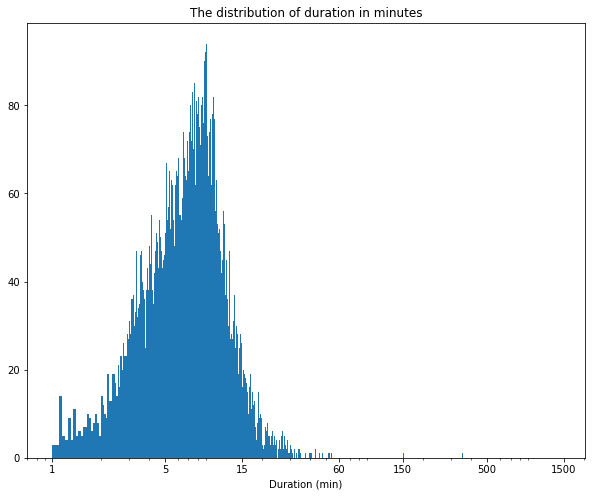

In [200]:
#Bar chart using Log scale.
log_binsize = 0.05
bins = np.arange(1, (go_bike['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize=[10, 8])
plt.hist(data = go_bike , x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 5, 15 , 60 , 150 , 500 , 1500] , [1, 5, 15 , 60 , 150 , 500 , 1500])
plt.xlabel('Duration (min)')
plt.title('The distribution of duration in minutes')
plt.show()

<b>The chart above reveals that the duration of bike users is is normally distributed and the longest duration by most riders is about 5 minutes</b>

<li><b>The top 5 stations with the most trips</b></li>

In [201]:
#get the number of stations 
print(len(go_bike['start_station_name'].value_counts()))
go_bike['start_station_name'].value_counts()

5


Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

<b>There are 329 stations in the dataset</b>

In [202]:
# Subset the dataset by keeping only top 8 locations with high traffics, df_top8. 
locs = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St','Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)']
go_bike_top5 = go_bike.loc[go_bike['start_station_name'].isin(locs)]

In [203]:
# Test and see if only keep top 5 station
go_bike_top5['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

In [204]:
# After creating a subset of the top 5 station with the most trip, plot a countplot to see the distribution and order from top 1 to top 5
st_stat_counts = go_bike_top5['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index
base_color = sb.color_palette()[0]

#### Q: What are the top 5 stations with most trips?

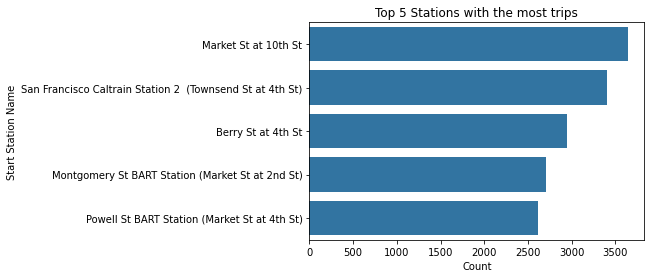

In [205]:
base_color = sb.color_palette()[0]
sb.countplot(data=go_bike_top5, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 5 Stations with the most trips');

##### From the plot above, it is evident that the Market St at 10th St is the station with the most trips and Powell St BART Station (Market St at 4th St) is the least among the top 5 stations.

#### Q: What is relationship between trip counts and time of the day / day of the week?

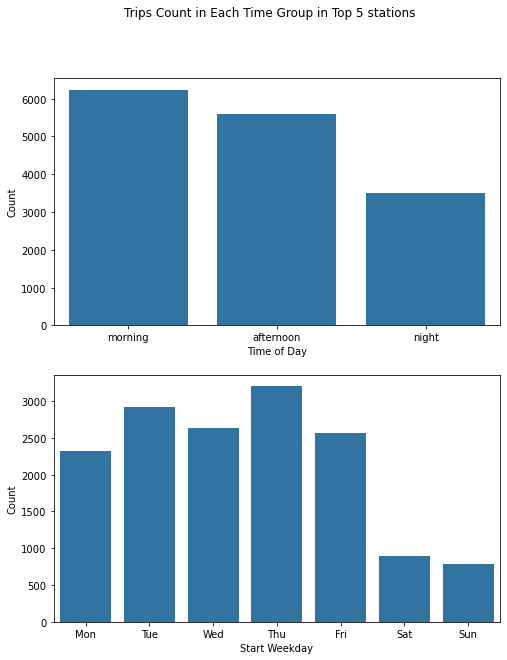

In [233]:
fig, ax = plt.subplots(nrows=2, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = go_bike_top5, x = 'period_day', color = default_color, ax = ax[0])
sb.countplot(data = go_bike_top5, x = 'start_weekday_char', color = default_color, ax = ax[1])
ax[0].set_xlabel('Start Month')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Time of Day')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Start Weekday')
ax[1].set_ylabel('Count')
fig.suptitle('Trips Count in Each Time Group in Top 5 stations');

From the plots on the top 5 stations, the following was observed:

1. There are more bike trips in the morining than in the afternoon and night time. The bike rides in the afternoon is more than that of the night time. Factors that could possibly contribute to the reduced bike rides can be poor visibility and personal safety.
2. There are more trips on weekdays than on weekends. This is probably because riders commute to their places of work on weekdays using these go bikes.

### <li> What is the relationship between Distribution of user type and gender among the top 5 stations</li>

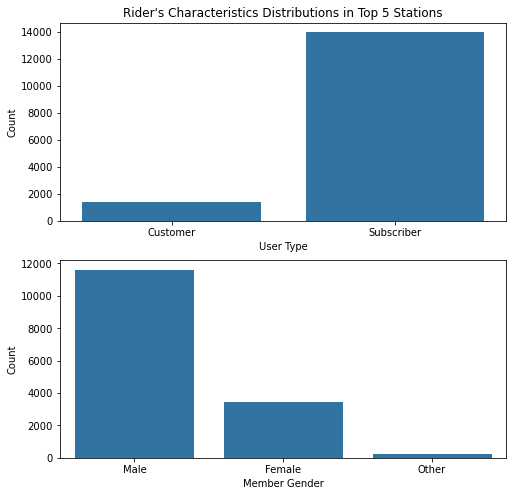

In [207]:
#plot a chart to reveal the distribution of user type and gender
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = go_bike_top5, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = go_bike_top5, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('Rider\'s Characteristics Distributions in Top 5 Stations');

In these top 8 trips stations, base on the above figures, I have the following findings:
<p>
<li>It is not strange to see that there are more subscribers than customers. It is cheaper and more codt effective to be a subscriber than to be a regular customer.</li>
<li>From the chart above, it is evident that the number of male riders are about 3 times that of the female riders.</li>
<li>There are some riders that have identified as 'Other' gender. I am not quite sure the reason for this; it may be that they prefer not to disclose or it might be a data entry error.</li>

#### Q: What is the age distribution among the top 5 stations?

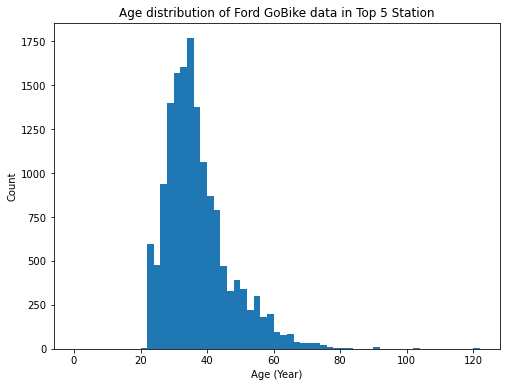

In [208]:
#plot a chart to show the age distribution of riders
plt.figure(figsize=(8,6))
bins = np.arange(0, go_bike_top5['age'].max()+2, 2)
plt.hist(data=go_bike_top5, x='age', bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Age distribution of Ford GoBike data in Top 5 Station');

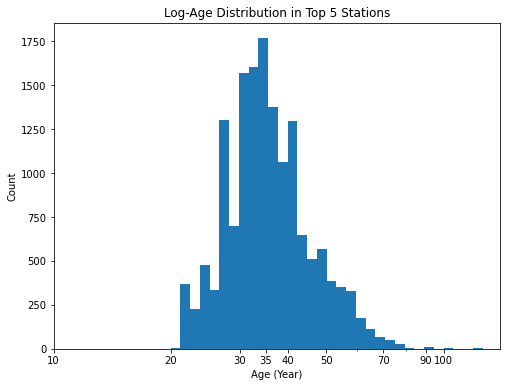

In [209]:
#due to the long tail in our distribution above, I will be plotting this on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(go_bike_top5['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = go_bike_top5, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Log-Age Distribution in Top 5 Stations');

The distribution above reveals that majority of the riders are about 35 years old. I also noticed observed that there some riders who are above 100 years old.

#### Q: What is the distribution of duration of trips?


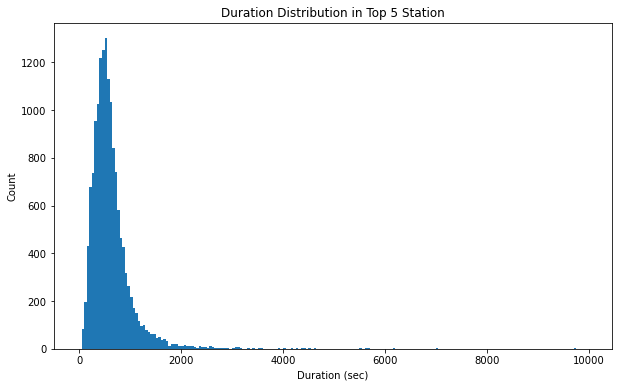

In [210]:
plt.figure(figsize=(10,6))
#bins = np.arange(0, do_bike_top5_le100['duration_sec'].max()+50, 100)
bins = np.arange(0, 10000, 50)
plt.hist(data=go_bike_top5, x='duration_sec', bins=bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration Distribution in Top 5 Station');

There's a long tail in the distribution, so I will put it on a log scale instead

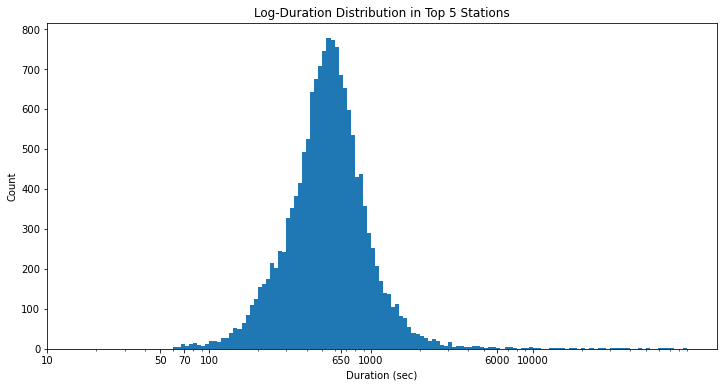

In [236]:
#plot on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(go_bike_top5['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = go_bike_top5, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,50,70,100,650,1000,6000,10000], [10,50,70,100,650,1000,6000,10000])
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Log-Duration Distribution in Top 5 Stations');

The above plot shows that the trips duration is normally distributed and most trip duration falls around 650 seconds.

In [211]:
#save the subsetted dataset to use for the remaining part of the analysis
go_bike_top5.to_csv("201902-fordgobike-tripdata.csv", index=False)

#### Transformations
The variables, age and duration_sec, look like right skewed, so I look into these two variables using a log transform. Under the transformations, age's data has one big peak between 30 and 40 years old and some small peak. Duration's data looks like unimodel with one peak between 550 and 650 seconds.

#### Data Cleaning
I am most interested in the most traffic locations. After looking into trips count in each station, I pick top 5 stations over 15,000 trips.

<li>Market St at 10th St</li>
<li>San Francisco Caltrain Station 2  (Townsend St at 4th St)
<li>Berry St at 4th St                                           
<li>Montgomery St BART Station (Market St at 2nd St)</li>
<li>Powell St BART Station (Market St at 4th St)</li>    

For the age distribution, there are few riders older than 90. They look like outliers. However, I will be keeping them in the dataset.
For the gender groups, there is a 'Other' category. I'm not quite sure why they are categosized as such, probably they prefer not to identify or it was a data entry problem.



## Bivariate Exploration

In [212]:
# create a lists of numeric variables and categorical variables
numeric_vars = ['age','duration_sec']
times_chr = ['period_day','start_weekday_char']
users_chr = ['user_type','member_gender']

In [213]:
# Order top 5 stations from the number one (most trips) to the number 5 (least trips)
loc_cl = locs = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St','Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)']
loc_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=loc_cl)
go_bike_top5['start_station_name'] = go_bike_top5['start_station_name'].astype(loc_cl2)

#### Q: What is the correlation between age and duration in seconds

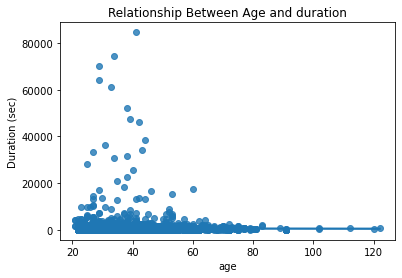

In [214]:
#Scatter plot chart
sb.regplot(data = go_bike_top5, x = 'age', y = 'duration_sec')
plt.ylabel('Duration (sec)')
plt.title('Relationship Between Age and duration')
plt.show()

Since no useful information can be gotten from the chart above, I will use a heathap to see if a relationship exists.

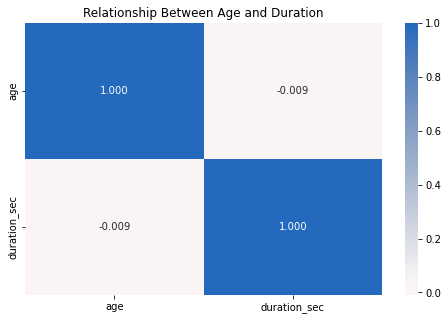

In [215]:
#plot a heatmap to show the correlation between age and duration in seconds
plt.figure(figsize = [8, 5])
sb.heatmap(go_bike_top5[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

From the above charts, I don't see any relationship between age and duration

#### Q: What is the distribution of Top 5 Stations by Times (time of the day and weekday)?

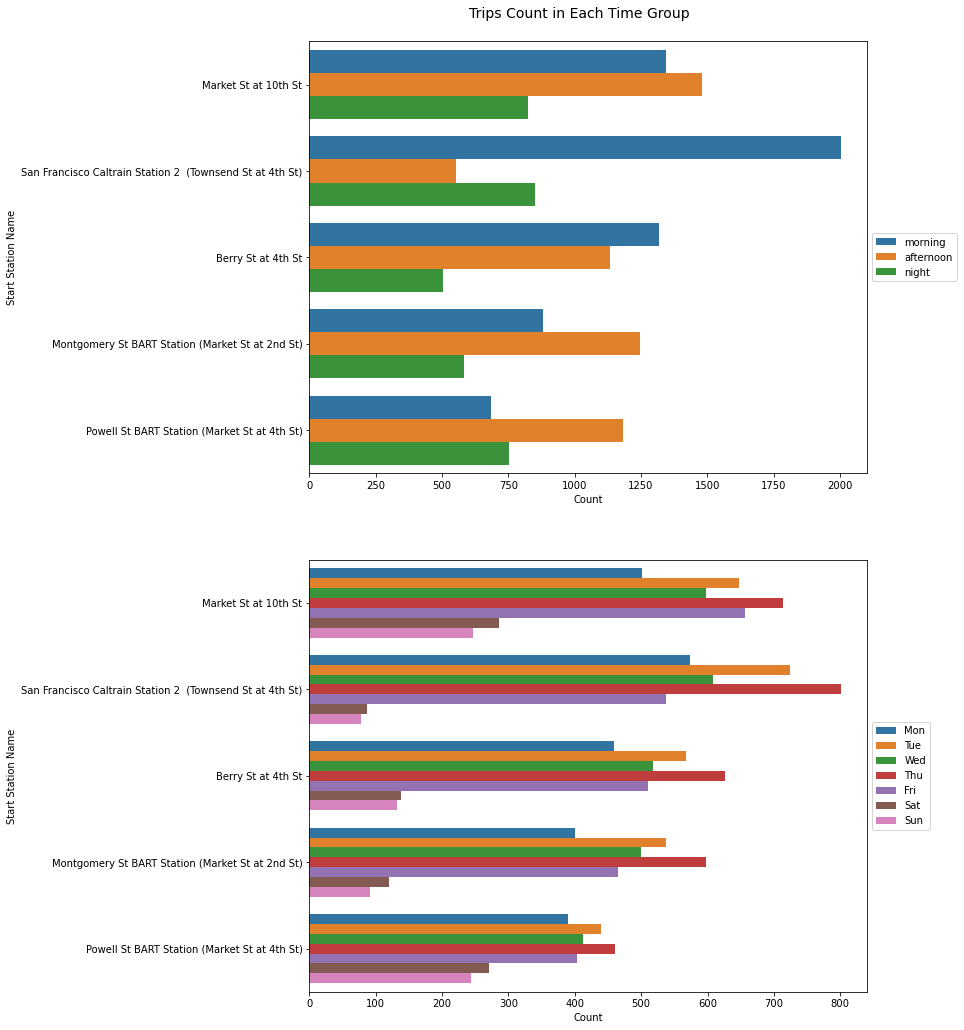

In [216]:
#plot the chart
fig = plt.figure(figsize=(10,16))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Time Group', fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=go_bike_top5, y='start_station_name', hue=times_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

From the chart above, the following were observed:
<br>
1. The time of the day does not have an effect on the trip duration. Some times riders had longer ride duration in the morning, lesser in the afternoon and the least at night. Other times riders had longer duration in the afternoon, lesser at night and the least in the morning.
2. Thursday is the day with the longest duration. I don't really know the reason for this.

#### Q:  What is the distribution for the top 5 stations by users' attributes (user_type, member's gender)?

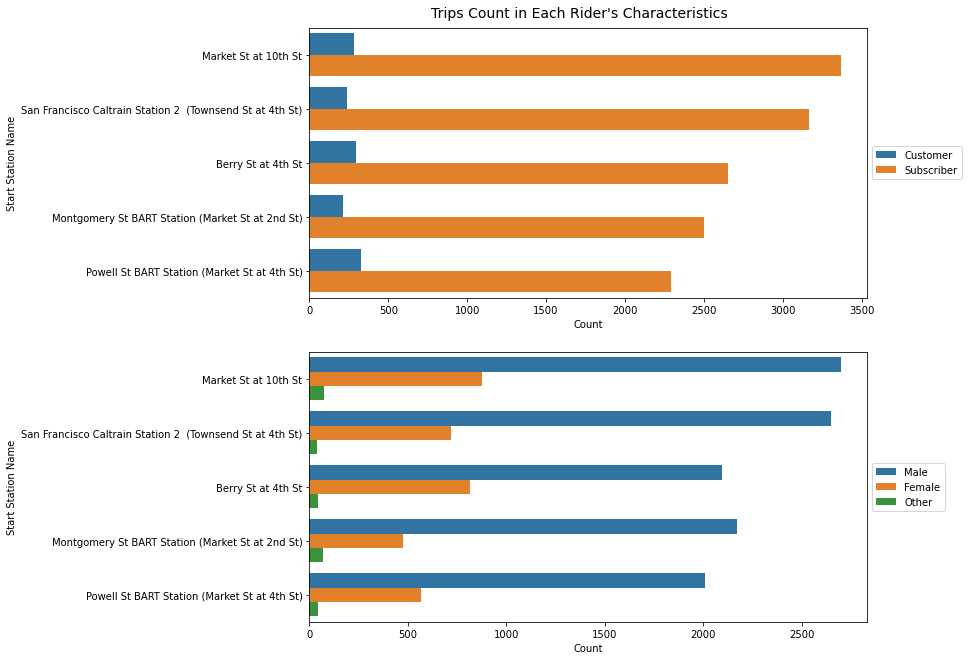

In [217]:
# plot a countplot
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Rider\'s Characteristics' , fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=go_bike_top5, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

From the chart above, the following were observed:

1. It is obvious that subscribers are more than the regular customers. Also, Market St at 10th St and San Francisco Caltrain Station 2 (Townsend St at 4th St) are the stations with the most trips count.
2. The chart reveals that the males has the highest trips count as compared to the females. 

#### Q: What is the distribution to show the the top 5 stations by age and trips duration?

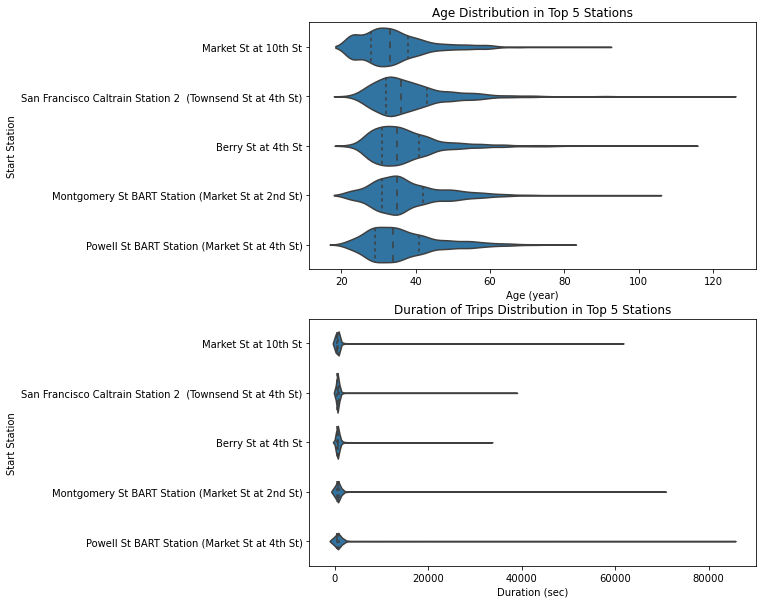

In [219]:
#plot a violin plot to show relationship
plt.figure(figsize=(8,10)
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=go_bike_top5, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xlabel('Age (year)')
plt.ylabel('Start Station')
plt.title('Age Distribution in Top 5 Stations')

ax = plt.subplot(212)
sb.violinplot(data=go_bike_top5, y='start_station_name', x='duration_sec', inner='quartile',color=base_color)
plt.xlabel('Duration (sec)')
plt.ylabel('Start Station')
plt.title('Duration of Trips Distribution in Top 5 Stations');

The plot looks squeezed, I will be using the log transform to expand the plot and derive useful insight.

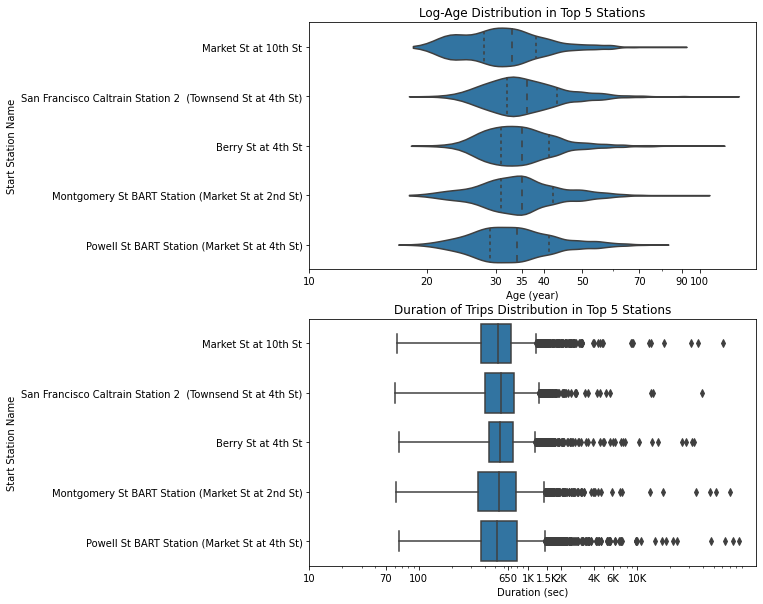

In [222]:
#plot a violin plot for age distribution and box plot for duratin of trips in the top 5 stations
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=go_bike_top5, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.ylabel('Start Station Name')
plt.xlabel('Age (year)')
plt.title('Log-Age Distribution in Top 5 Stations')

ax = plt.subplot(212)
sb.boxplot(data=go_bike_top5, y='start_station_name', x='duration_sec',color=base_color)
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
plt.xlabel('Duration (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration of Trips Distribution in Top 5 Stations');

1. I used the violin plot to find the relationship between the top 5 stations and the age of the riders. I discovered that Market St at 10 St has the lowest median and San Francisco Caltrain Station 2 (Towsend St at 4th St) has the highest median. Most of median age population (between 30 to 40) is consistent in each station.

2. For the duration of trips in the top 5 stations, Powell St BART Station (Market St at 4th St) has the lowest median.

#### Observed relationships in bivariate exploration.
In the top 8 stations, look into the attributes' times and users:

<b>Time:</b>
<li>After separating into eight stations, morning is not necessary the one with most trips. But half of stations has the most trips in the morning and another half of stations has the most trips in the afternoon.</li>
<li>There are more trips during the weekdays than in weekends. However, in customers, some stations like San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St stations have more trips than others in the weekend. Will tourist attractions be another feature causing more trips? Also, compared to other weekdays, Friday has slightly less than trips. I am guessing probably more people work from home that day instead of being in the office.</li>

<p><b>User:</b>
<li>Age: most of age population falls between 30 and 40 years old. It might imply there are full time employees and commuters.</li>
<li>Gender: the number of trips in males is way more than the number in females. It needs to be investigated more.</li>
<li>Subscribe: the number of trips in subscribers is more than the number in customers because of pricing and population.</li></p>

#### Any interesting relationships between the other features
Age and duration of trips are slightly negative-correlated. Majority of age population locates between 30 and 40 years old, so it is probably the reason that other age groups are not observed.

## Multivariate Exploration

#### Q: Is there any relationship between trip time of the day and the user type in the top 5 stations?

In [225]:
#Top 5 trip stations by times: taking into consideration customers and subscribers seperately
go_bike_cus = go_bike_top5.query('user_type == "Customer"')

go_bike_sub = go_bike_top5.query('user_type == "Subscriber"')

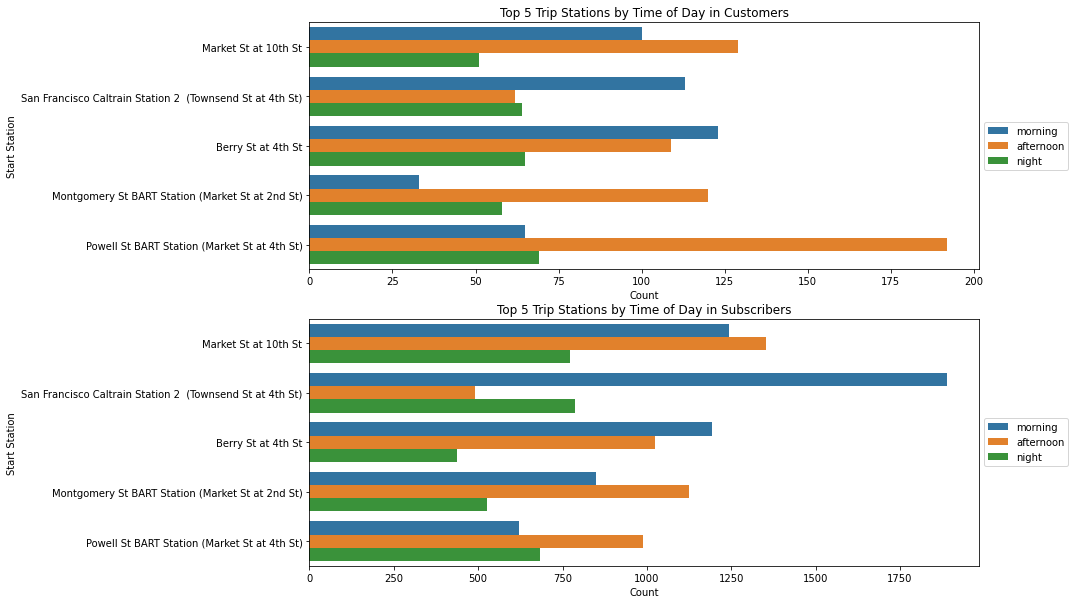

In [226]:
# plot a countplot to show the trip by time of the day between customers and subscribers
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=go_bike_cus, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station')

ax = plt.subplot(212)
sb.countplot(data=go_bike_sub, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by Time of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station');

There are more trips taken in the morning and afternoon for both customers and subscribers.

#### Q: Is there any relationship between trips taken on a particular weekday and the user type in the top 5 stations?

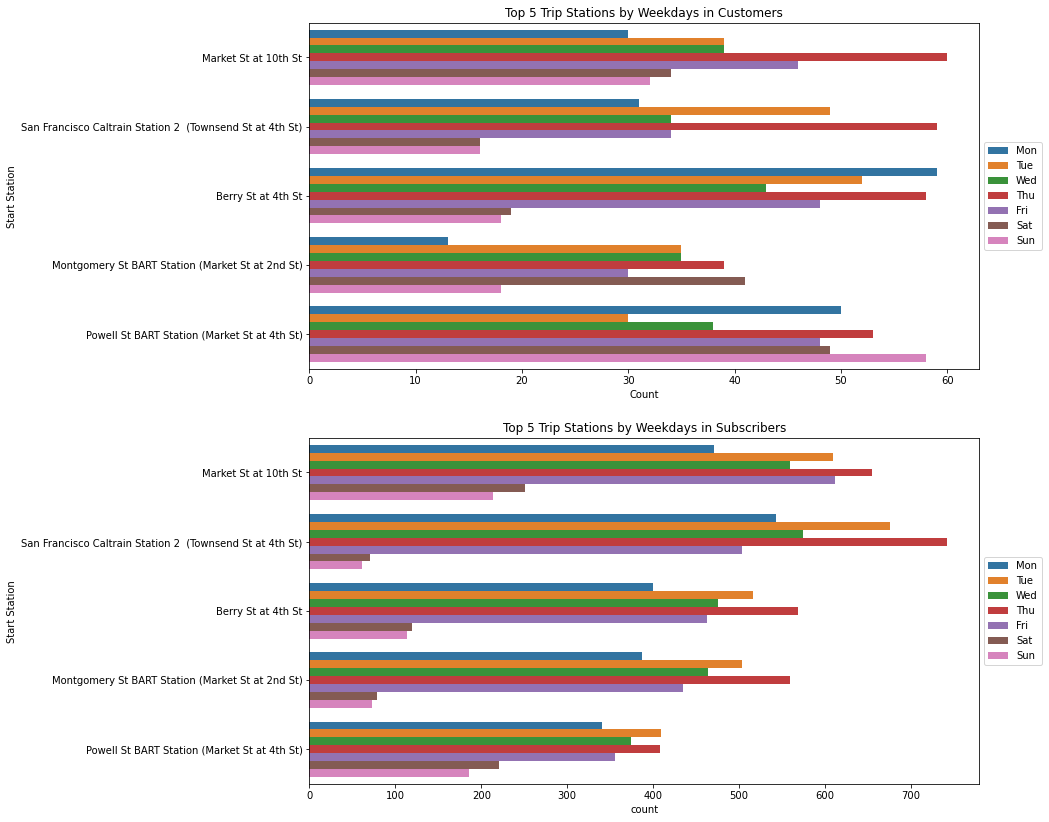

In [229]:
#plot a countplot to see the relationship
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=go_bike_cus, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by Weekdays in Customers')
plt.ylabel('Start Station')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=go_bike_sub, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by Weekdays in Subscribers')
plt.ylabel('Start Station');

1. Customers make more trips during weekdays than weekends except for the Powell St BART Station (Market St at 4th St).
2. Subscribers make less trips during the weekend and more trips during weekdays.

#### Q: Is there any relationship between gender of the rider and the time of the day trips are taken among the top 5 stations?

In [230]:
#take into consideration the gender group
go_bike_f = go_bike_top5.query('member_gender == "Female"')
go_bike_m = go_bike_top5.query('member_gender == "Male"')

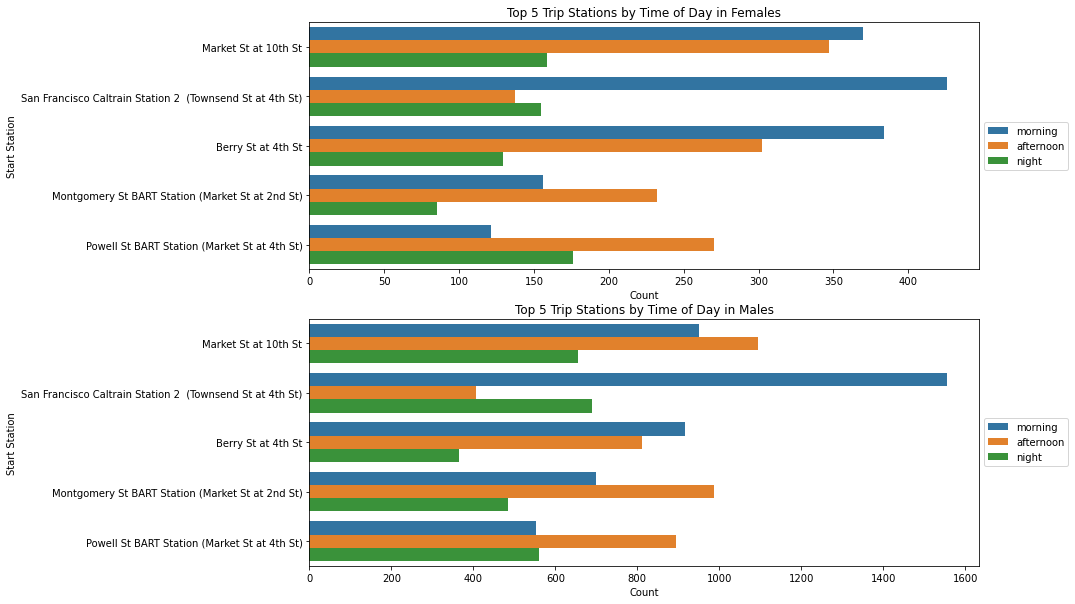

In [232]:
#plot a countplot
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=go_bike_f, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by Time of Day in Females')
plt.xlabel('Count')
plt.ylabel('Start Station')

ax = plt.subplot(212)
sb.countplot(data=go_bike_m, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by Time of Day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station');

1. Females whose start stations are Market st at 10th St, Berry St at 4th St, and Montgometry St Bart Station (Market St at 2nd St) do take their trips in the morning and afternoon  time. Females at San Francisco Caltrain Station 2 (Townsend St at 4th St) take thier trips in the morning and night time, while females at Powell St BART Station (Market St at 4th St) take their trips in the afternoon and night time.
2. Males make most of their trips in the morning and afternoon time of the day.

### Features strengthen each other in terms of looking at locations and times
Distinguishing user types, subscribers and customers, reveals more information from location and time. Customers might be tourists who like to ride a bike during the weekend. The trips in subscribers increase during the weekdays.


### Conclusion


Majority of trips took place at the Market St at 10th St. User types play a crucial part here to affect the number of trips in each time groups. Thus, getting more user types' attributes will help understand the characteristics of trips more and get more traffic.

### References

<a href="https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv">1. Dataset of Ford Gobike 2019 </a>
